In [1]:
import numpy as np 
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("../data/cpucycle.csv")

In [3]:
df.head()

,timestamp,cpu
0,2024-01-01 00:00:00,0.22
1,2024-01-01 00:00:30,0.26
2,2024-01-01 00:01:00,0.16
3,2024-01-01 00:01:30,0.16
4,2024-01-01 00:02:00,0.10


In [4]:
df.set_index("timestamp", inplace=True)

In [5]:
df.index = pd.to_datetime(df.index)

In [6]:
df.index

DatetimeIndex(['2024-01-01 00:00:00', '2024-01-01 00:00:30',
               '2024-01-01 00:01:00', '2024-01-01 00:01:30',
               '2024-01-01 00:02:00', '2024-01-01 00:02:30',
               '2024-01-01 00:03:00', '2024-01-01 00:03:30',
               '2024-01-01 00:04:00', '2024-01-01 00:04:30',
               ...
               '2024-01-30 23:55:30', '2024-01-30 23:56:00',
               '2024-01-30 23:56:30', '2024-01-30 23:57:00',
               '2024-01-30 23:57:30', '2024-01-30 23:58:00',
               '2024-01-30 23:58:30', '2024-01-30 23:59:00',
               '2024-01-30 23:59:30', '2024-01-31 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=85749, freq=None)

In [7]:
df.head()

,cpu
timestamp,
2024-01-01 00:00:00,0.22
2024-01-01 00:00:30,0.26
2024-01-01 00:01:00,0.16
2024-01-01 00:01:30,0.16
2024-01-01 00:02:00,0.10


In [8]:
print(df.index.dtype)


datetime64[ns]


In [9]:
df = df.asfreq("30s")


In [10]:
window = 7 * 24 * 60 * 2
y_recent = df
y_train = y_recent[(-window * 2):-window]
y_test = y_recent[-window:]


In [11]:
print(df.index.freq)


<30 * Seconds>


In [12]:
print(y_train.describe)


<bound method NDFrame.describe of                       cpu
timestamp                
2024-01-17 00:00:30  0.21
2024-01-17 00:01:00  0.13
2024-01-17 00:01:30  0.08
2024-01-17 00:02:00  0.10
2024-01-17 00:02:30  0.12
...                   ...
2024-01-23 23:58:00  0.02
2024-01-23 23:58:30  0.01
2024-01-23 23:59:00  0.00
2024-01-23 23:59:30  0.26
2024-01-24 00:00:00  0.23

[20160 rows x 1 columns]>


In [13]:
model = ARIMA(y_train, order=(5,1,0))
model_fit = model.fit()

In [14]:
len(y_train)

20160

In [15]:
y_train_pred = model_fit.predict(start=y_train.index[0], end=y_train.index[-1], dynamic=False)

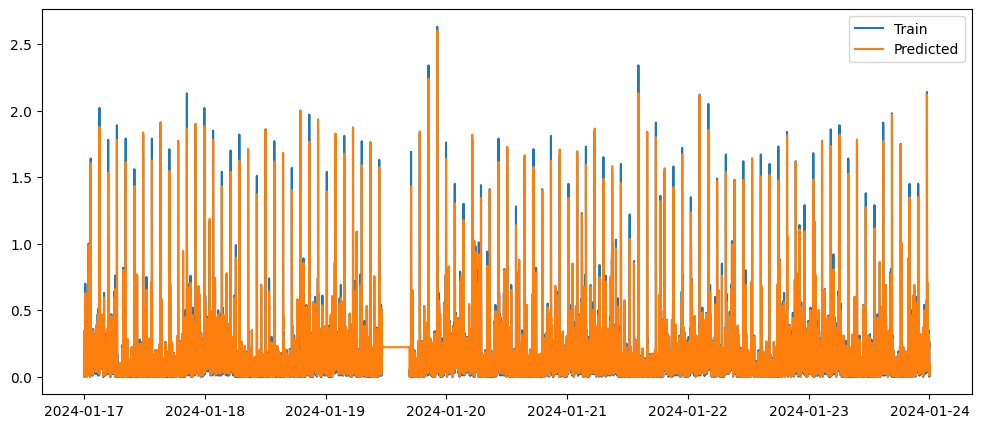

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_train.index, y_train_pred, label="Predicted")
plt.legend()
plt.show()

In [17]:
y_test_pred = model_fit.predict(start=y_test.index[0], end=y_test.index[-1], dynamic=False)

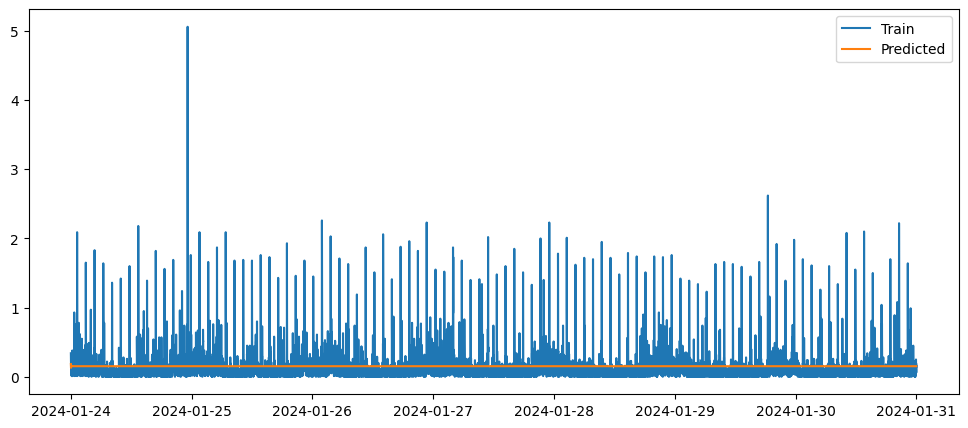

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Train")
plt.plot(y_test.index, y_test_pred, label="Predicted")
plt.legend()
plt.show()